### Importing

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import requests
from io import StringIO 

In [ ]:
kdd_df.head()

In [50]:
url = 'https://drive.google.com/file/d/14fb5WPdutbn6H-XcAsKMdJV1ekZL2yyY/view?usp=sharing' 
dwn_url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
response = requests.get(dwn_url)

file_object = StringIO(response.content.decode('utf-8'))
kdd_df = pd.read_csv(file_object,header=None)
kdd_df.head()

,0,1,2,3
0,"<html><head><meta http-equiv=""content-type"" co...",arial,sans-serif; background-color: #fff; color: #0...,we can't process your request right now.</p><...


In [49]:
url = 'https://drive.google.com/file/d/14fb5WPdutbn6H-XcAsKMdJV1ekZL2yyY/view?usp=sharing' 
dwn_url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
url2 = requests.get(dwn_url).content
csv_raw = StringIO(url2)
kdd_df = pd.read_csv(csv_raw,header=None)
kdd_df.head()

TypeError: initial_value must be str or None, not bytes

### Setup and Cleaning

In [38]:
#import data without header
kdd_df = pd.read_csv(kdd_csv,header=None)
kdd_df.head()

,0,1,2,3
0,"<html><head><meta http-equiv=""content-type"" co...",arial,sans-serif; background-color: #fff; color: #0...,we can't process your request right now.</p><...


In [35]:
dwn_url_T

'https://drive.google.com/uc?export=download&id=14fb5WPdutbn6H-XcAsKMdJV1ekZL2yyY'

In [3]:
#import column names and start cleaning them 
with open('kdd_names.txt') as f:
    kdd_cols = f.readlines()
    
for i in range(1,len(kdd_cols)):
    kdd_cols[i] = kdd_cols[i].split(':')[0].strip()
    
kdd_cols.append('connection_type')

attack_types = kdd_cols.pop(0)
attack_types = attack_types.split(',')
attack_types[-1] = attack_types[-1].replace('.\n','')

print('KDD columns:', '\n',kdd_cols, '\n'*2+ 
      'List of attack types:','\n',attack_types)

KDD columns: 
 ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'connection_type'] 

List of attack types: 
 ['back', 'buffer_overflow', 'ftp_write', 'guess_passwd', 'imap', 'ipsweep', 'land', 'loadmodule', 'multihop', 'neptune', 'nmap', 'normal', 'perl', 'phf', 'pod', 'portsweep', 'rootkit', 'satan', 'smurf', 'spy', '

In [4]:
#set correct columns
kdd_df.columns = kdd_cols
kdd_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
kdd_df.connection_type.value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: connection_type, dtype: int64

In [6]:
#clean connection types
kdd_df.connection_type = kdd_df.connection_type.apply(lambda x: x.replace('.',''))
kdd_df.connection_type.unique

<bound method Series.unique of 0         normal
1         normal
2         normal
3         normal
4         normal
           ...  
494016    normal
494017    normal
494018    normal
494019    normal
494020    normal
Name: connection_type, Length: 494021, dtype: object>

In [7]:
#read attack types and their respective category
connections_df = pd.read_csv('training_attack_types.txt',sep=' ',header=None)
connections_df.columns = ['type','category']

#normal connections are not listed in this .txt file so we add them
connections_df = connections_df.append({'type':'normal','category':'normal'},ignore_index=True)
connections_df.head()

,type,category
0,back,dos
1,buffer_overflow,u2r
2,ftp_write,r2l
3,guess_passwd,r2l
4,imap,r2l


In [8]:
#create dict of connection type and resp. category
connections_dict = {}

for i in range(len(connections_df)):
    row = connections_df.iloc[i]
    key = row['type']
    val = row['category']
    
    connections_dict[key] = val
    
connections_dict

{'back': 'dos',
 'buffer_overflow': 'u2r',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'imap': 'r2l',
 'ipsweep': 'probe',
 'land': 'dos',
 'loadmodule': 'u2r',
 'multihop': 'r2l',
 'neptune': 'dos',
 'nmap': 'probe',
 'perl': 'u2r',
 'phf': 'r2l',
 'pod': 'dos',
 'portsweep': 'probe',
 'rootkit': 'u2r',
 'satan': 'probe',
 'smurf': 'dos',
 'spy': 'r2l',
 'teardrop': 'dos',
 'warezclient': 'r2l',
 'warezmaster': 'r2l',
 'normal': 'normal'}

In [9]:
#map each connection to its category
kdd_df['connection_category'] = kdd_df['connection_type'].apply(lambda x: connections_dict[x])
kdd_df[['connection_type','connection_category']].value_counts()

connection_type  connection_category
smurf            dos                    280790
neptune          dos                    107201
normal           normal                  97278
back             dos                      2203
satan            probe                    1589
ipsweep          probe                    1247
portsweep        probe                    1040
warezclient      r2l                      1020
teardrop         dos                       979
pod              dos                       264
nmap             probe                     231
guess_passwd     r2l                        53
buffer_overflow  u2r                        30
land             dos                        21
warezmaster      r2l                        20
imap             r2l                        12
rootkit          u2r                        10
loadmodule       u2r                         9
ftp_write        r2l                         8
multihop         r2l                         7
phf              r2l   

In [10]:
kdd_df['connection_category'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: connection_category, dtype: int64

In [11]:
#faster way to find and remove uplicated num values
kdt = kdd_df.describe().transpose()

useless_rows = []

for i in range(len(kdt)):
    row = kdt.iloc[i]
    mu = row['mean']
    sigma = row['std']
    q1 = row['25%']
    q2 = row['50%']
    q3 = row['75%']
    mx = row['max']
    
    if mu==sigma and sigma==q1 and q1==q2 and q2==q3 and q3==mx:
        print(row)
        print()
        useless_rows.append(row.name)

count    494021.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: num_outbound_cmds, dtype: float64

count    494021.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: is_host_login, dtype: float64



In [12]:
#remove dupe rows
for row in useless_rows:
    kdd_df.drop(row,axis=1,inplace=True)

In [13]:
#41 instead of 43 rows
kdd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

### Exploration

In [15]:
kdd_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
#extract all numerical columns and create a dataframe copy for exploration
kdd_num_cols = kdd_df.describe().columns
kdd_num_df = kdd_df[kdd_num_cols].copy().astype(float)
kdd_num_df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,181.0,5450.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,9.0,9.0,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0.0,239.0,486.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,19.0,19.0,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0.0,235.0,1337.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,29.0,29.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0.0,219.0,1337.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,39.0,39.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0.0,217.0,2032.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,49.0,49.0,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


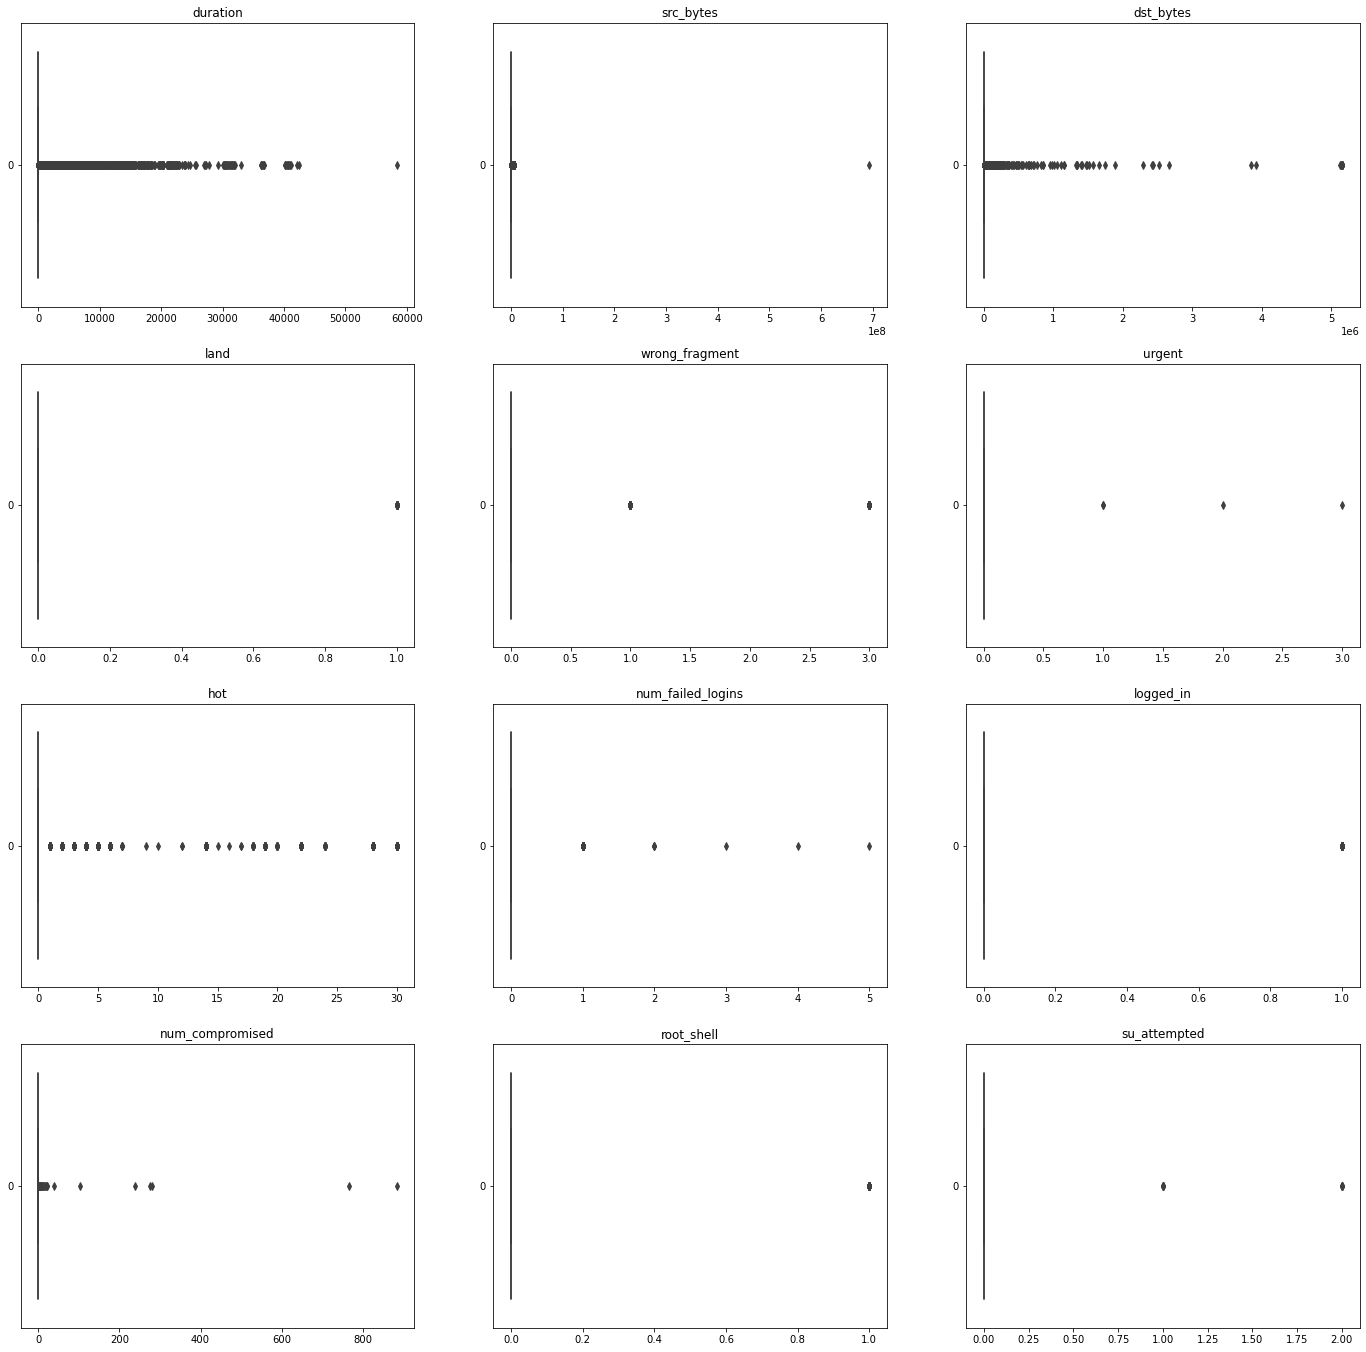

In [17]:
#we plot 12 of our numerical columns at a time so that they are readable and so that we can inspect any possible outliers
fig,axs = plt.subplots(nrows=4,ncols=3,figsize=(24,24))

pos = 0

for col in kdd_num_df.columns[:12]:    
    i = pos//3
    j = pos%3 
    sns.boxplot(data=kdd_num_df[col],orient='h',ax=axs[i][j])
    axs[i][j].set_title(col)
    pos+=1

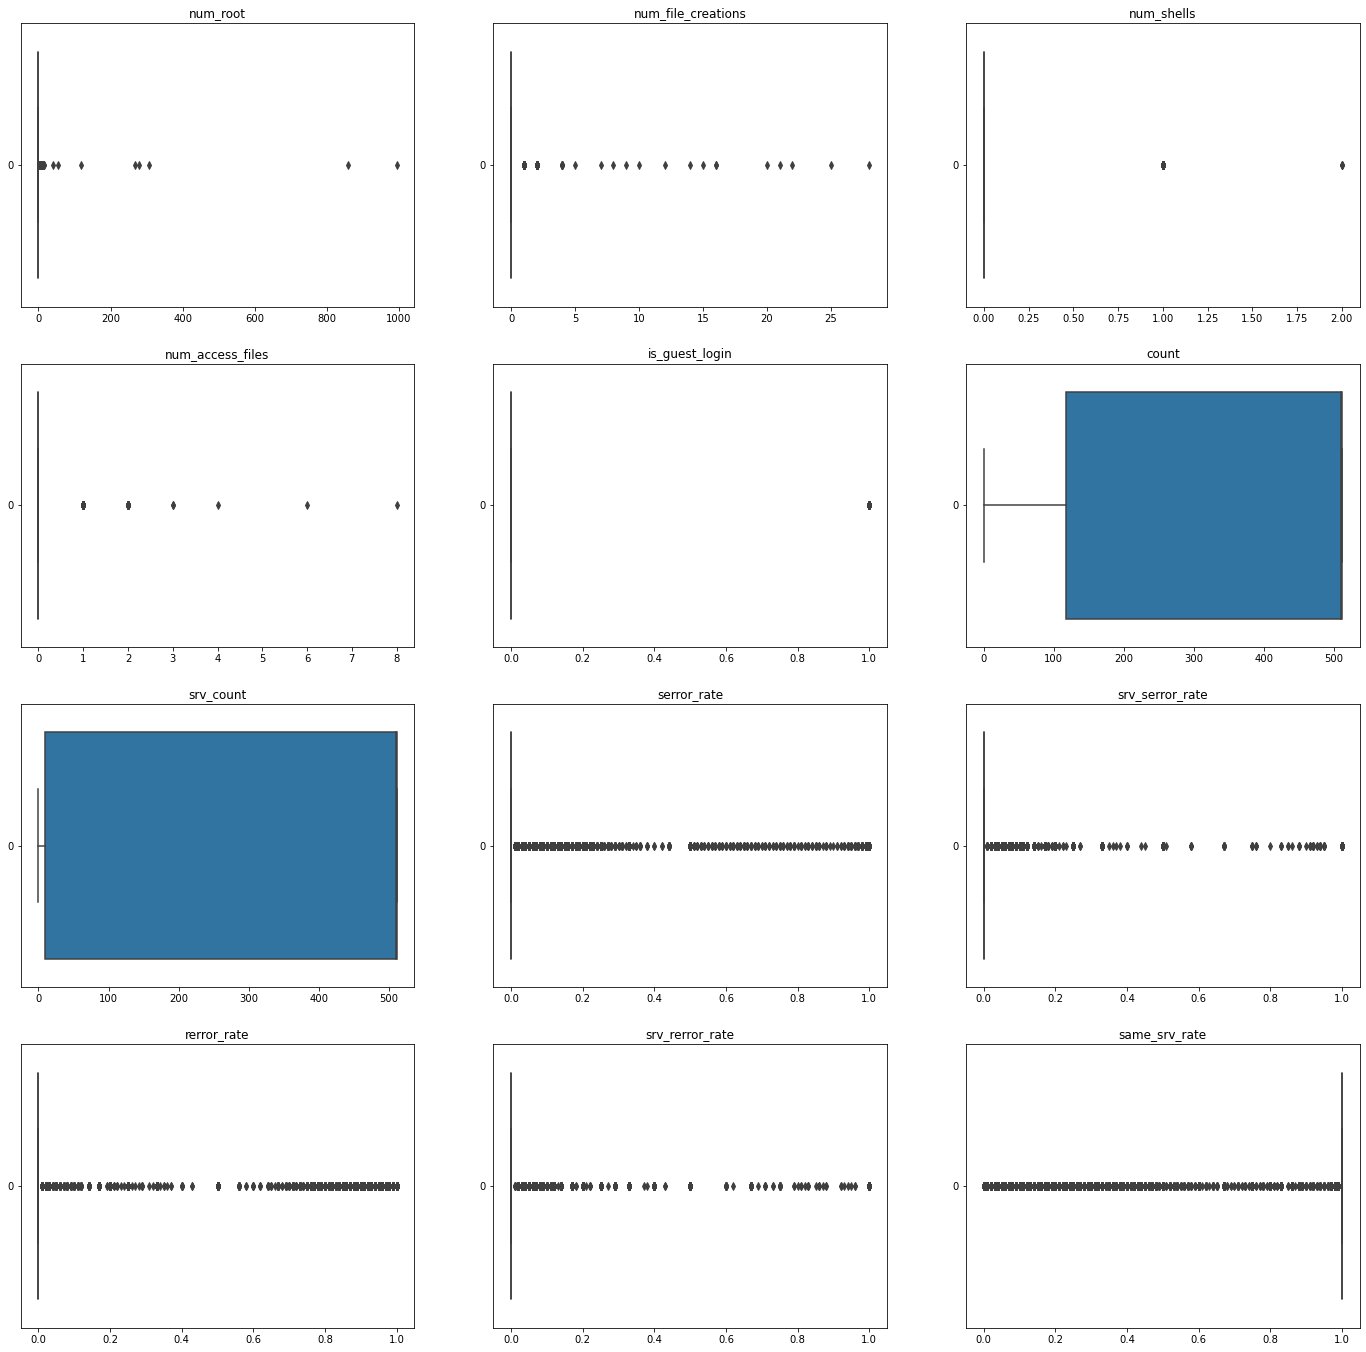

In [18]:
fig,axs = plt.subplots(nrows=4,ncols=3,figsize=(24,24))

pos = 0

for col in kdd_num_df.columns[12:24]:    
    i = pos//3
    j = pos%3 
    sns.boxplot(data=kdd_num_df[col],orient='h',ax=axs[i][j])
    axs[i][j].set_title(col)
    pos+=1

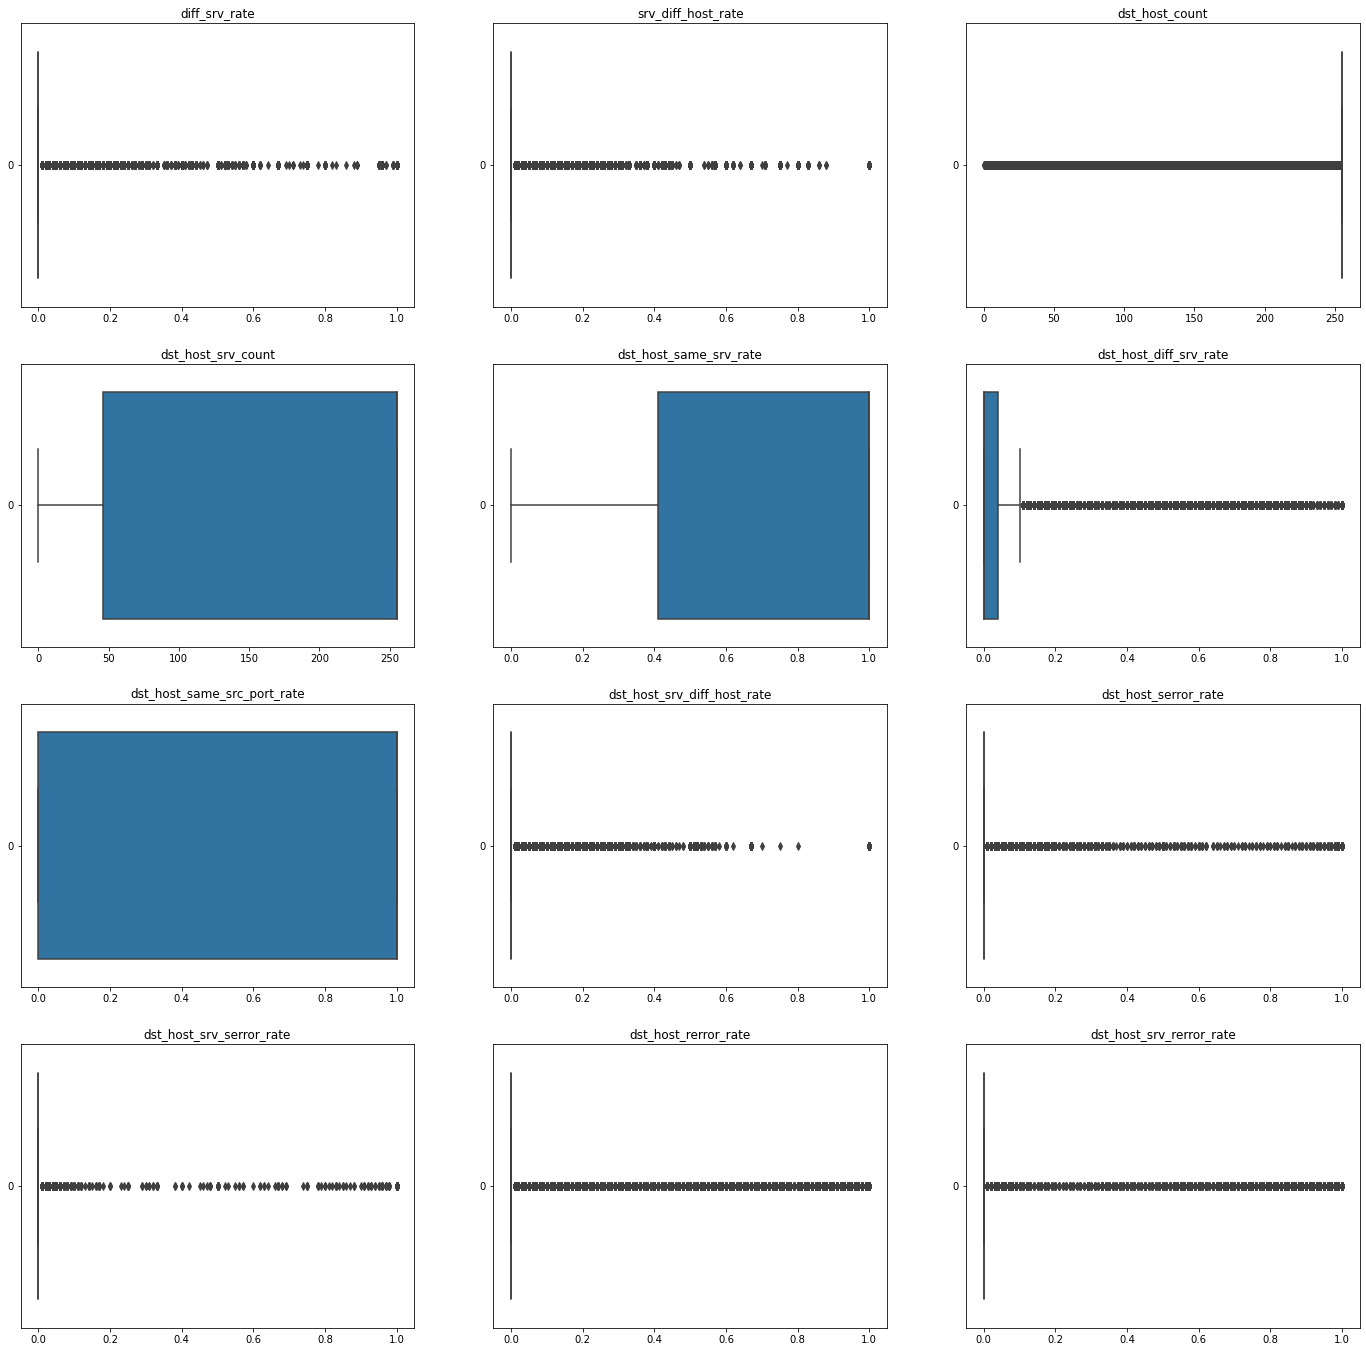

In [19]:
fig,axs = plt.subplots(nrows=4,ncols=3,figsize=(24,24))

pos = 0

for col in kdd_num_df.columns[24:36]:    
    i = pos//3
    j = pos%3 
    sns.boxplot(data=kdd_num_df[col],orient='h',ax=axs[i][j])
    axs[i][j].set_title(col)
    pos+=1

`src_bytes`, `land`, `wrong_fragment`, `urgent`, `num_failed_logins`, `loggined_in`, `root_shell`, `su_attempted`, 
`num_shells`, and `is_guest_login` stand out as the most anomalous box plots so I try 3 scalings and explore again

In [20]:
kdd_std_df = kdd_num_df.copy()
kdd_norm_df = kdd_num_df.copy()
kdd_log_df = kdd_num_df.copy()

for col in kdd_std_df:
    mu = kdd_std_df[col].mean()
    sigma = kdd_std_df[col].std()
    
    kdd_std_df[col] = (kdd_std_df[col] - mu ) / sigma
    
for col in kdd_norm_df:
    mu = kdd_norm_df[col].min()
    sigma = kdd_norm_df[col].max() - mu
    
    kdd_norm_df[col] = (kdd_norm_df[col] - mu ) / sigma
    
for col in kdd_log_df:
    kdd_log_df[col] = kdd_log_df[col].apply(lambda x: math.log(1+x))

Text(0.5, 1.0, 'Log')

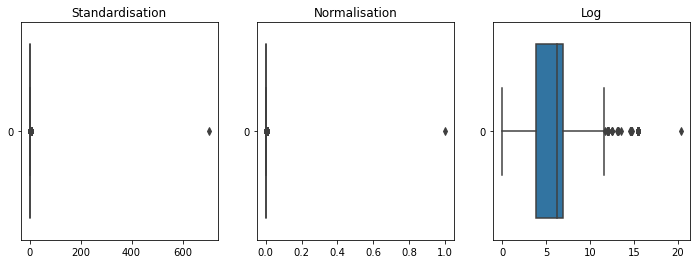

In [21]:
fig,axs = plt.subplots(figsize=(12,4),ncols=3)


sns.boxplot(data=kdd_std_df['src_bytes'],ax=axs[0],orient='h')
axs[0].set_title('Standardisation')
sns.boxplot(data=kdd_norm_df['src_bytes'],ax=axs[1],orient='h')
axs[1].set_title('Normalisation')
sns.boxplot(data=kdd_log_df['src_bytes'],ax=axs[2],orient='h')
axs[2].set_title('Log')

Standardisation keeps a somewhat similar structure as before with the maximum values still far from the min. and IQR. Normalisation is a bit better but all the non-extreme values will be essentially mapped to 0. 
To see how squished Normalisation values are near 0:

1.488371e-06    228035
0.000000e+00    115342
7.499542e-07     52774
1.514331e-07      7370
2.120063e-07      2725
                 ...  
4.095904e-06         1
4.493957e-06         1
3.455558e-06         1
8.938878e-06         1
6.801508e-06         1
Name: src_bytes, Length: 3300, dtype: int64


<AxesSubplot:>

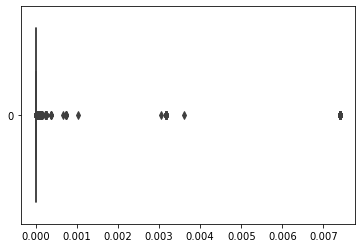

In [22]:
print(kdd_norm_df['src_bytes'].sort_values().value_counts())

sns.boxplot(data=kdd_norm_df[kdd_norm_df['src_bytes']<1]['src_bytes'],orient='h')

Log seems to be the best at first glance for our scaling choice but we explore further across all 3 transforms.

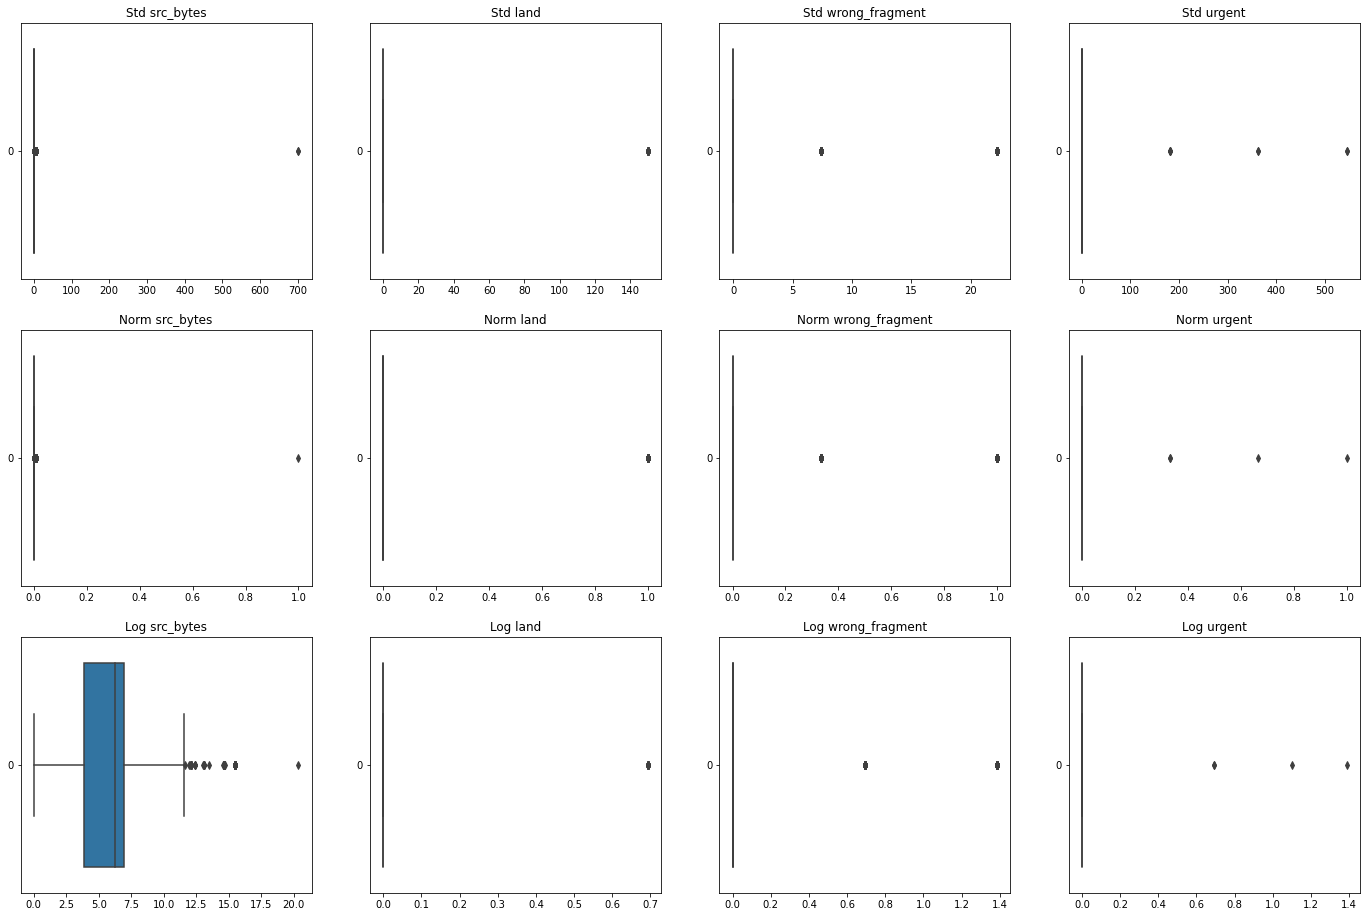

In [23]:
#these are the columns that seemed most skewed/'anomalous'
col_check = ['src_bytes', 'land', 'wrong_fragment', 'urgent', 'num_failed_logins', 'root_shell', 'su_attempted', 
'num_shells']

fig, axs = plt.subplots(figsize=(24,16),nrows=3,ncols=4)   

pos = 0

#We display each row to correspond to a transform and each column to a feature
for n,col in enumerate(col_check[:4]):
    for r in range(4):
        i = pos%3
        j = n

        if i == 0:
            sns.boxplot(data=kdd_std_df[col],orient='h',ax=axs[i][j])
            axs[i][j].set_title('Std'+' '+col)
        if i == 1:
            sns.boxplot(data=kdd_norm_df[col],orient='h',ax=axs[i][j])
            axs[i][j].set_title('Norm'+' '+col)
        if i == 2:
            sns.boxplot(data=kdd_log_df[col],orient='h',ax=axs[i][j])
            axs[i][j].set_title('Log'+' '+col)

        pos+=1
        
plt.savefig('standardised_anomalies_1.png')

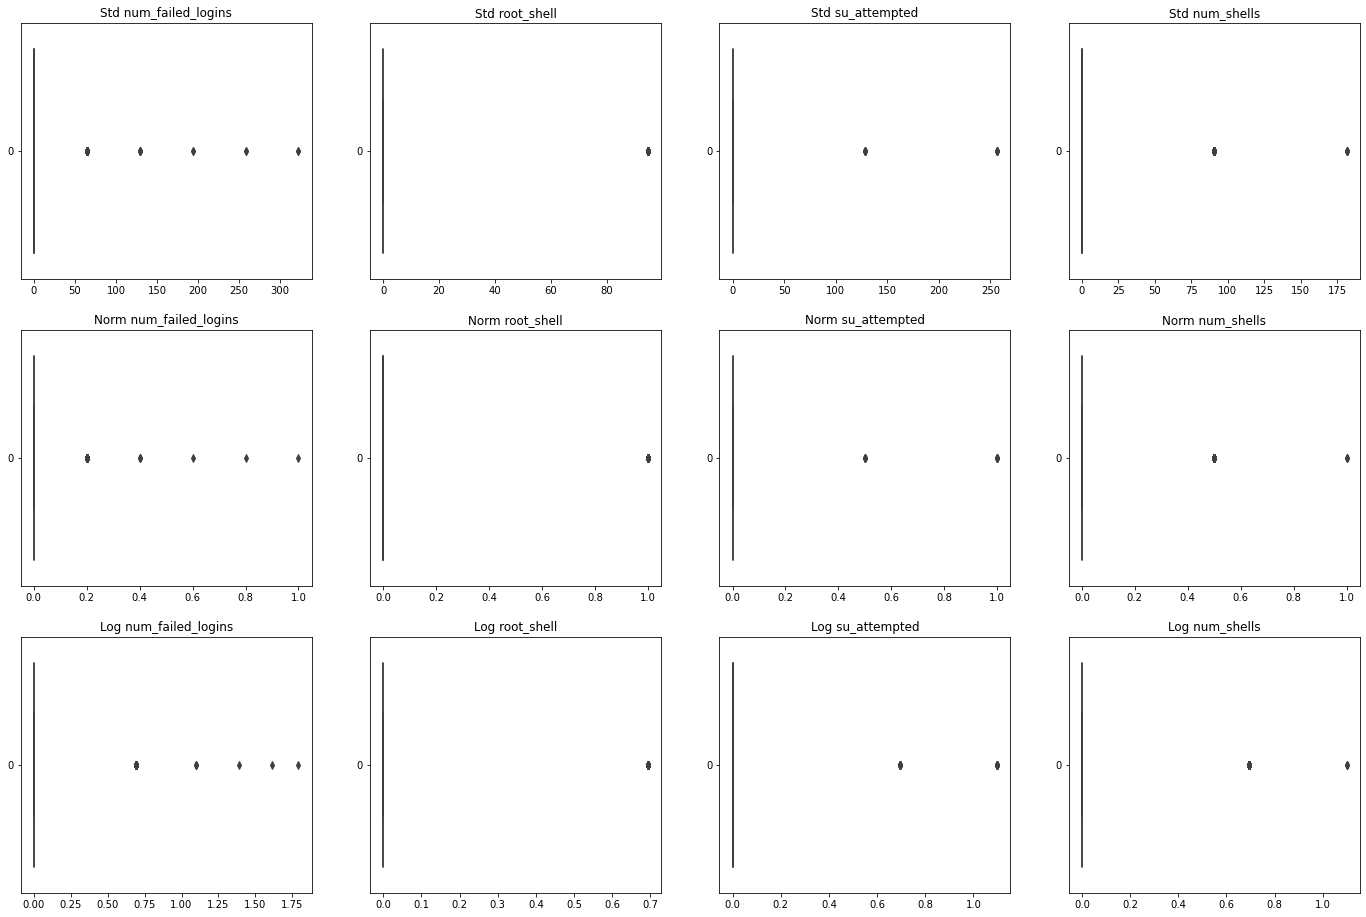

In [24]:
fig, axs = plt.subplots(figsize=(24,16),nrows=3,ncols=4)   

pos = 0

for n,col in enumerate(col_check[4:]):
    for r in range(4):
        i = pos%3
        j = n

        if i == 0:
            sns.boxplot(data=kdd_std_df[col],orient='h',ax=axs[i][j])
            axs[i][j].set_title('Std'+' '+col)
        if i == 1:
            sns.boxplot(data=kdd_norm_df[col],orient='h',ax=axs[i][j])
            axs[i][j].set_title('Norm'+' '+col)
        if i == 2:
            sns.boxplot(data=kdd_log_df[col],orient='h',ax=axs[i][j])
            axs[i][j].set_title('Log'+' '+col)

        pos+=1
        
plt.savefig('standardised_anomalies_2.png')

<AxesSubplot:>

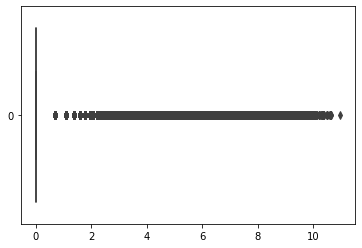

In [25]:
sns.boxplot(data=kdd_log_df['duration'],orient='h')

In [26]:
klt = kdd_log_df.describe().transpose()

We check to see if we scaled values to lie in close intervals to one another.<br></br>
**Heuristic: -1/3 to 1/3 if small values, -3 to 3 if larger values, equivalent 0 to 6.**<br></br>
All our values are non-negative, we check which ones have max above 6.

In [27]:
klt[klt['max']>6].sort_values('max',ascending=False)

,count,mean,std,min,25%,50%,75%,max
src_bytes,494021.0,4.978740,2.863505,0.0,3.828641,6.25575,6.940222,20.357082
dst_bytes,494021.0,1.182156,2.667729,0.0,0.000000,0.00000,0.000000,15.455569
duration,494021.0,0.104682,0.833807,0.0,0.000000,0.00000,0.000000,10.973872
num_root,494021.0,0.001843,0.060987,0.0,0.000000,0.00000,0.000000,6.901737
num_compromised,494021.0,0.003304,0.053720,0.0,0.000000,0.00000,0.000000,6.785588
count,494021.0,5.020404,1.882039,0.0,4.770685,6.23637,6.238325,6.238325
srv_count,494021.0,4.427168,2.154978,0.0,2.397895,6.23637,6.238325,6.238325


There may be justification to scale these values more so that they are closer to one another/more similar. Normalisation does this (in fact, it will set all our values to lie strictly in [0,1]) but we end up with very small values near 0 for most our data/quantiles when we have features that have largely skewed data e.g. `src_bytes`

However, I decide to keep the log-transform as is and not scale it any further for now and instead explore how it will perform on a number of different classifiers.

## OOPS!

So, I realised that some of the data was binary and/or specifically discrete and I think I transformed them which may or not cause some issues... Basically:

In [28]:
for c in kdd_df:
    col = kdd_df[c]
    
    if (col.dtype == np.int64 or col.dtype == np.float64) and col.nunique()<4:
        print('---'+c+'---')
        print(col.value_counts())
        print()

---land---
0    493999
1        22
Name: land, dtype: int64

---wrong_fragment---
0    492783
3       970
1       268
Name: wrong_fragment, dtype: int64

---logged_in---
0    420784
1     73237
Name: logged_in, dtype: int64

---root_shell---
0    493966
1        55
Name: root_shell, dtype: int64

---su_attempted---
0    494009
1         6
2         6
Name: su_attempted, dtype: int64

---num_shells---
0    493970
1        48
2         3
Name: num_shells, dtype: int64

---is_guest_login---
0    493336
1       685
Name: is_guest_login, dtype: int64



So I just need to revisit the data feature meanings again to get better understanding of wtf is going on lol. I'll sort this out during/after the weekend and then start running the models.